In [1]:
import ast
import json
import re
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np

In [2]:
XGBoost_files = [
    "experiment_xgboost_istella_5-800873.out",
    "experiment_xgboost_istella_5-800874.out",
    "experiment_xgboost_istella_5-800875.out",
    "experiment_xgboost_istella_5-800876.out",
    "experiment_xgboost_istella_5-800877.out",
]

XGBoost_NDCGs = []
XGBoost_runtimes = []
for file in XGBoost_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    XGBoost_runtimes.append(time)
    XGBoost_NDCGs.append(eval(lines[0])["test"]["NDCG@5"])

In [3]:
Without_Hessian_files = [
    "experiment_without_hessian_istella_5-800878.out",
    "experiment_without_hessian_istella_5-800879.out",
    "experiment_without_hessian_istella_5-800880.out",
    "experiment_without_hessian_istella_5-800881.out",
    "experiment_without_hessian_istella_5-800882.out",
]

Without_Hessian_NDCGs = []
Without_Hessian_runtimes = []
for file in Without_Hessian_files:
    with open(file, "r") as f:
        lines = f.readlines()
    time = []
    for i in eval(lines[1]):
        time.append(i["time"])
    Without_Hessian_runtimes.append(time)
    Without_Hessian_NDCGs.append(eval(lines[0])["test"]["NDCG@5"])

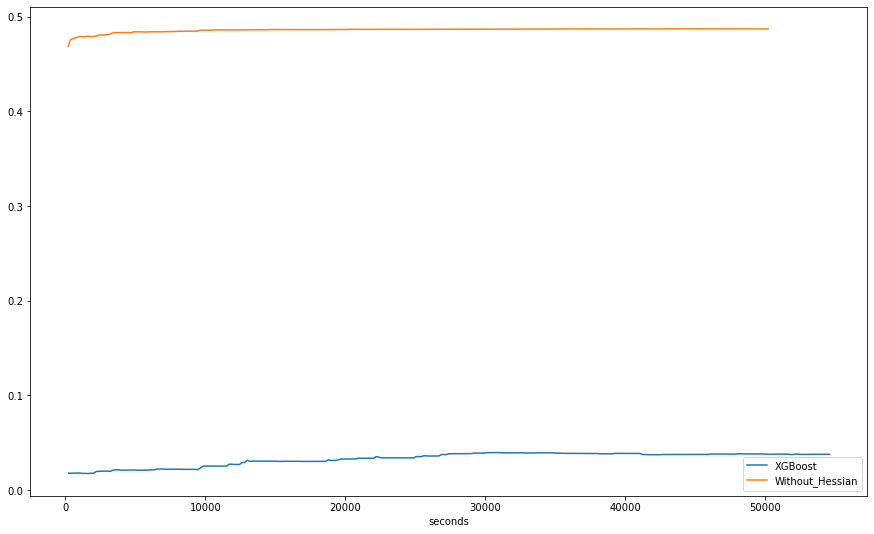

In [5]:
plt.figure(figsize=(15, 9))
# plt.plot(
#     np.mean(np.array(NN_runtimes), axis=0),
#     np.mean(np.array(NN_NDCGs), axis=0),
#     label="NN",
# )
plt.plot(
    np.mean(np.array(XGBoost_runtimes), axis=0),
    np.mean(np.array(XGBoost_NDCGs), axis=0),
    label="XGBoost",
)
plt.plot(
    np.mean(np.array(Without_Hessian_runtimes), axis=0),
    np.mean(np.array(Without_Hessian_NDCGs), axis=0),
    label="Without_Hessian",
)
plt.legend()
plt.xlabel("seconds")
plt.show()

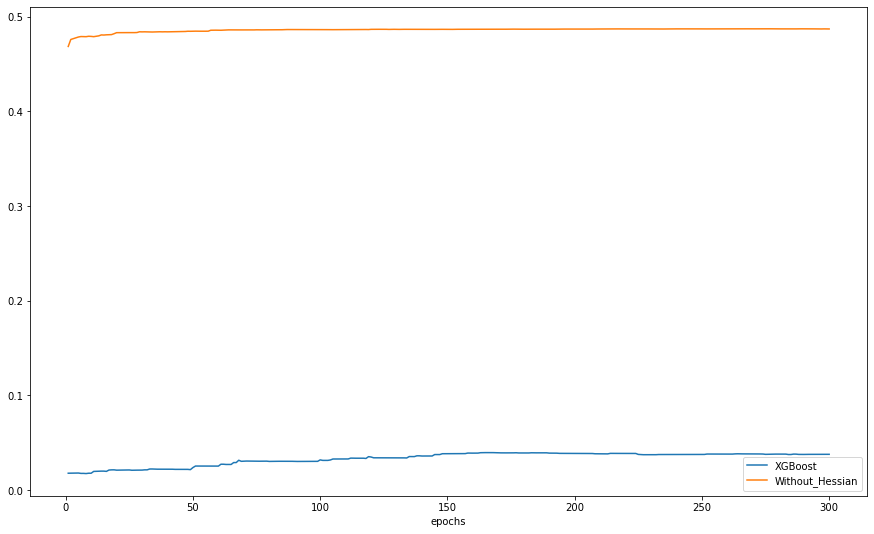

In [7]:
plt.figure(figsize=(15, 9))
t = np.arange(1, 301)
# plt.plot(
#     t, np.mean(np.array(NN_NDCGs)[:, 1:], axis=0), label="NN",
# )
plt.plot(
    t, np.mean(np.array(XGBoost_NDCGs), axis=0), label="XGBoost",
)
plt.plot(
    t, np.mean(np.array(Without_Hessian_NDCGs), axis=0), label="Without_Hessian",
)
plt.legend()
plt.xlabel("epochs")
plt.show()